In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [2]:
matplotlib.rc("font", family = "Malgun Gothic")

In [3]:
pd.options.display.max_rows=8000
pd.options.display.max_columns=999

In [4]:
df_raw = pd.read_csv(r"Card_Spanding_cl3.csv", engine="python", encoding='utf-8-sig')
df_raw.head()

,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
0,20180401,노원구,상계2동,종로구 상계2동,자동차정비,여성,42,4,3,56,18.66666667,82,public,0
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,4,2,50,25,61,travel,0
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,5,2,59,29.5,140,shopping,1
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,4,3,56,18.66666667,104,life,1
4,20180401,노원구,중계4동,종로구 중계4동,음료식품,여성,38,3,2,57,28.5,103,life,1


In [5]:
df_raw1 = df_raw[df_raw["신용카드"] ==1]
df_raw1.head()

,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,5,2,59,29.5,140,shopping,1
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,4,3,56,18.66666667,104,life,1
4,20180401,노원구,중계4동,종로구 중계4동,음료식품,여성,38,3,2,57,28.5,103,life,1
5,20180401,종로구,평창동,노원구 평창동,유통업,남성,61,6,2,51,25.5,145,onlineShopping,1
6,20180401,노원구,공릉2동,노원구 공릉2동,음료식품,남성,69,6,4,58,14.5,106,life,1


In [6]:
#사용횟수 기준 상위 10개 카드
df_raw1.groupby(["사용카드"])["사용횟수"].sum().reset_index().sort_values(by='사용횟수',ascending=False).head(10)

,사용카드,사용횟수
130,218,700542
128,216,677409
131,219,670353
129,217,659264
126,214,654927
127,215,654150
133,221,637181
132,220,637075
71,159,314109
70,158,293972


In [7]:
df_date = df_raw1.groupby(["사용일자"])['사용금액'].sum()

In [8]:
df_date.head()

사용일자
20180401    748671
20180402    568143
20180403    709240
20180404    642566
20180405    554309
Name: 사용금액, dtype: int64

In [9]:
df_date_df = pd.DataFrame(df_date).reset_index()
df_date_df.head()

,사용일자,사용금액
0,20180401,748671
1,20180402,568143
2,20180403,709240
3,20180404,642566
4,20180405,554309


In [10]:
# change column nane

df_date_df.columns = ['사용일자', '누적사용금액']
df_date_df.head()

,사용일자,누적사용금액
0,20180401,748671
1,20180402,568143
2,20180403,709240
3,20180404,642566
4,20180405,554309


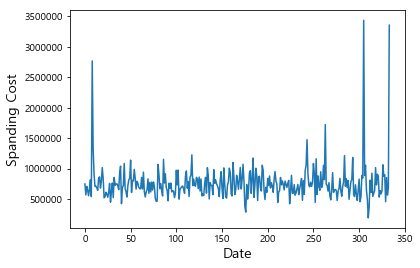

In [11]:
# 사용일자별 사용금액
plt.plot(df_date_df.index, df_date_df.누적사용금액)

plt.ylabel('Spanding Cost', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()


In [12]:
twenty = df_raw1[df_raw1["age_group"]==2]
df_date_twenty = twenty.groupby(["사용일자"])['사용금액'].sum()

In [13]:
df_date_twenty_df = pd.DataFrame(df_date_twenty).reset_index()
df_date_twenty_df.head()

,사용일자,사용금액
0,20180401,230782
1,20180402,85910
2,20180403,46784
3,20180404,101047
4,20180405,40371


In [14]:
# change column nane
df_date_twenty_df.columns = ['사용일자', '누적사용금액']
df_date_twenty_df.head()

,사용일자,누적사용금액
0,20180401,230782
1,20180402,85910
2,20180403,46784
3,20180404,101047
4,20180405,40371


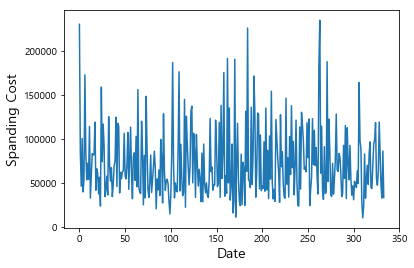

In [15]:
# 날짜별 20대 누적 사용 금액
plt.plot(df_date_twenty_df.index, df_date_twenty_df.누적사용금액)

plt.ylabel('Spanding Cost', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()


In [16]:
twenty.head()

,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
26,20180401,종로구,청운효자동,종로구 청운효자동,보건위생,여성,22,2,3,56,18.66666667,155,onlineShopping,1
32,20180401,노원구,상계2동,노원구 상계2동,유통업,여성,25,2,46,133,2.891304348,218,comm,1
34,20180401,노원구,상계2동,노원구 상계2동,의료기관,남성,26,2,53,198,3.735849057,100,life,1
47,20180401,노원구,"중계2,3동","노원구 중계2,3동",의복,남성,28,2,35,191,5.457142857,139,shopping,1
117,20180401,노원구,상계5동,종로구 상계5동,보건위생,여성,29,2,18,141,7.833333333,107,life,1


In [17]:
twenty_group = twenty.groupby(["사용일자", "소비처업종"])["사용금액"].sum()

In [18]:
twenty_group_df = pd.DataFrame(twenty_group).reset_index()

twenty_group_df.head()

,사용일자,소비처업종,사용금액
0,20180401,광학제품,222
1,20180401,레저업소,1260
2,20180401,보건위생,1232
3,20180401,서적문구,42827
4,20180401,수리서비스,97


In [19]:
twenty_group_df['소비처업종'].unique()

array(['광학제품', '레저업소', '보건위생', '서적문구', '수리서비스', '신변잡화', '유통업', '의료기관',
       '의복', '사무통신', '연료판매', '음료식품', '자동차정비', '주방용품', '요식업소', '가전',
       '자동차판매', '직물', '문화취미', '가구', '전기'], dtype=object)

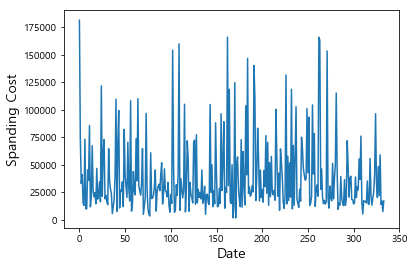

In [20]:
twenty_group_yu = twenty_group_df[twenty_group_df["소비처업종"] == '유통업']

twenty_group_yu = pd.DataFrame(twenty_group_yu).reset_index()

plt.plot(twenty_group_yu.index, twenty_group_yu.사용금액)

plt.ylabel('Spanding Cost', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()

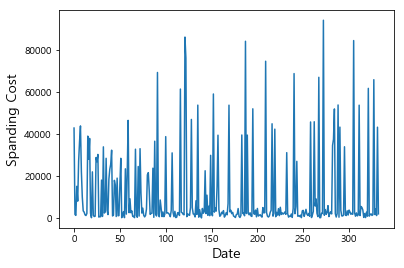

In [21]:
twenty_group_seo = twenty_group_df[twenty_group_df["소비처업종"] == '서적문구']

twenty_group_seo = pd.DataFrame(twenty_group_seo).reset_index()

plt.plot(twenty_group_seo.index, twenty_group_seo.사용금액)

plt.ylabel('Spanding Cost', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()

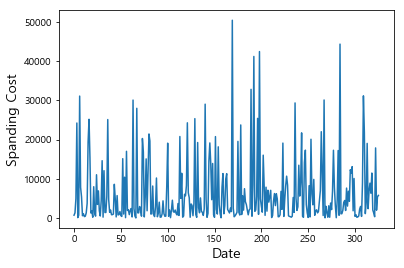

In [22]:
twenty_group_medi = twenty_group_df[twenty_group_df["소비처업종"] == '의료기관']

twenty_group_medi = pd.DataFrame(twenty_group_medi).reset_index()

plt.plot(twenty_group_medi.index, twenty_group_medi.사용금액)

plt.ylabel('Spanding Cost', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()

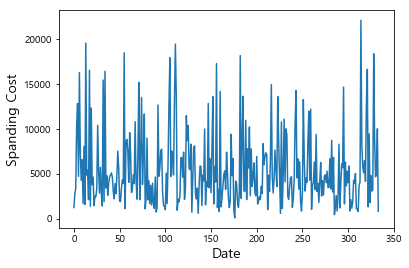

In [23]:
twenty_group_bogun = twenty_group_df[twenty_group_df["소비처업종"] == '보건위생']

twenty_group_bogun = pd.DataFrame(twenty_group_bogun).reset_index()

plt.plot(twenty_group_bogun.index, twenty_group_bogun.사용금액)

plt.ylabel('Spanding Cost', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()